In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import matplotlib.mlab as mlab
from scipy.stats import norm
import yfinance as yf
from tabulate import tabulate

In [3]:
!pip install yfinance

     |████████████████████████████████| 63 kB 1.1 MB/s 
     |████████████████████████████████| 6.4 MB 12.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [14]:
tickers = ['AAPL','FB', 'C', 'DIS']
weights = np.array([.25, .3, .15, .3])
initial_investment = 1000000
 
df=yf.download(tickers=tickers,start="2018-01-01",end="2022-04-30")
df=df[['Close']]
returns=df.Close.pct_change()
returns.tail()

[*********************100%***********************]  4 of 4 completed


,AAPL,C,DIS,FB
Date,,,,
2022-04-25,0.006737,-0.001952,0.014205,0.015643
2022-04-26,-0.037328,-0.017602,-0.034848,-0.032301
2022-04-27,-0.001467,-0.012542,-0.004837,-0.033158
2022-04-28,0.045155,0.008468,0.000694,0.175936
2022-04-29,-0.036605,-0.036186,-0.031746,-0.025567


In [16]:
cov_matrix = returns.cov()
cov_matrix

,AAPL,C,DIS,FB
AAPL,0.000426,0.000236,0.000182,0.000300
C,0.000236,0.000611,0.000300,0.000219
DIS,0.000182,0.000300,0.000396,0.000193
FB,0.000300,0.000219,0.000193,0.000629


In [17]:
avg_rets = returns.mean()
port_mean = avg_rets.dot(weights)
port_stdev = np.sqrt(weights.T.dot(cov_matrix).dot(weights))
mean_investment = (1+port_mean) * initial_investment
stdev_investment = initial_investment * port_stdev
conf_level1 = 0.05
cutoff1 = norm.ppf(conf_level1, mean_investment, stdev_investment)
var_1d1 = initial_investment - cutoff1
var_1d1

29174.79404621618

1 day VaR @ 95% confidence: 29174.79
2 day VaR @ 95% confidence: 41259.39
3 day VaR @ 95% confidence: 50532.23
4 day VaR @ 95% confidence: 58349.59
5 day VaR @ 95% confidence: 65236.82
6 day VaR @ 95% confidence: 71463.36
7 day VaR @ 95% confidence: 77189.25
8 day VaR @ 95% confidence: 82518.78
9 day VaR @ 95% confidence: 87524.38
10 day VaR @ 95% confidence: 92258.8
11 day VaR @ 95% confidence: 96761.85
12 day VaR @ 95% confidence: 101064.45
13 day VaR @ 95% confidence: 105191.22
14 day VaR @ 95% confidence: 109162.08
15 day VaR @ 95% confidence: 112993.49


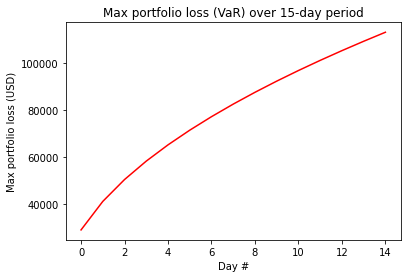

In [18]:
var_array = []
num_days = int(15)
for x in range(1, num_days+1):    
    var_array.append(np.round(var_1d1 * np.sqrt(x),2))
    print(str(x) + " day VaR @ 95% confidence: " + str(np.round(var_1d1 * np.sqrt(x),2)))

# Build plot
plt.xlabel("Day #")
plt.ylabel("Max portfolio loss (USD)")
plt.title("Max portfolio loss (VaR) over 15-day period")
plt.plot(var_array, "r")

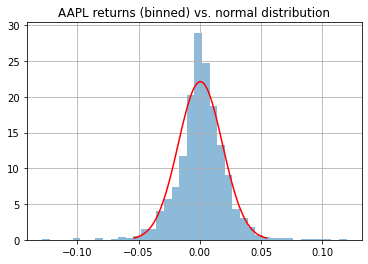

In [21]:
returns['AAPL'].hist(bins=40, density=True,histtype="stepfilled",alpha=0.5)
x = np.linspace(port_mean - 3*port_stdev, port_mean+3*port_stdev,100)
plt.plot(x, norm.pdf(x, port_mean, port_stdev), "r")
plt.title("AAPL returns (binned) vs. normal distribution")
plt.show()

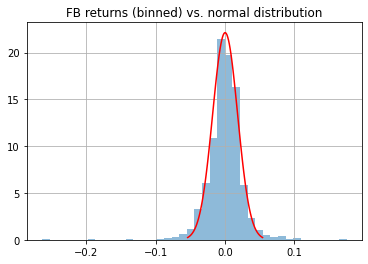

In [22]:
returns['FB'].hist(bins=40, density=True,histtype="stepfilled",alpha=0.5)
x = np.linspace(port_mean - 3*port_stdev, port_mean+3*port_stdev,100)
plt.plot(x, norm.pdf(x, port_mean, port_stdev), "r")
plt.title("FB returns (binned) vs. normal distribution")
plt.show()

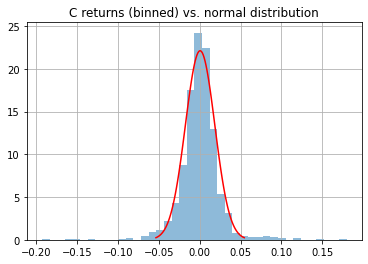

In [23]:
returns['C'].hist(bins=40, density=True,histtype="stepfilled",alpha=0.5)
x = np.linspace(port_mean - 3*port_stdev, port_mean+3*port_stdev,100)
plt.plot(x, norm.pdf(x, port_mean, port_stdev), "r")
plt.title("C returns (binned) vs. normal distribution")
plt.show()

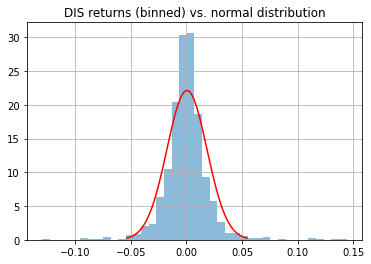

In [24]:
returns['DIS'].hist(bins=40, density=True,histtype="stepfilled",alpha=0.5)
x = np.linspace(port_mean - 3*port_stdev, port_mean+3*port_stdev,100)
plt.plot(x, norm.pdf(x, port_mean, port_stdev), "r")
plt.title("DIS returns (binned) vs. normal distribution")
plt.show()